## Required packages and libraries for this notebook
imblearn, pandas, numpy, scikit-learn (sklearn), opencv (cv2), matplotlib, xgboost, tensorflow, keras

## 1- Reading dataset and performing initial data preparation

### 1-1- Reading dataset

In [1]:
import pandas as pd
filename = r'D:\datasets\KaggleDatasets\prostateCancerPrediction\archive\prostate_cancer_prediction.csv'
first_dataset = pd.read_csv(filename)
first_dataset.head()

,Patient_ID,Age,Family_History,Race_African_Ancestry,PSA_Level,DRE_Result,Biopsy_Result,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,...,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Screening_Age,Follow_Up_Required,Prostate_Volume,Genetic_Risk_Factors,Previous_Cancer_History,Early_Detection
0,1,78,No,Yes,5.07,Normal,Benign,No,No,No,...,Moderate,No,No,Normal,45,No,46.0,No,No,Yes
1,2,68,No,Yes,10.24,Normal,Benign,Yes,No,No,...,Low,No,No,High,65,No,78.2,No,No,Yes
2,3,54,No,No,13.79,Normal,Benign,No,No,No,...,Low,No,No,Normal,61,No,21.1,No,No,Yes
3,4,82,No,No,8.03,Abnormal,Benign,No,No,No,...,Low,No,No,Normal,47,Yes,79.9,No,Yes,Yes
4,5,47,Yes,No,1.89,Normal,Malignant,Yes,Yes,No,...,Moderate,Yes,No,Normal,72,No,32.0,No,No,Yes


In [2]:
first_dataset.columns

Index(['Patient_ID', 'Age', 'Family_History', 'Race_African_Ancestry',
       'PSA_Level', 'DRE_Result', 'Biopsy_Result', 'Difficulty_Urinating',
       'Weak_Urine_Flow', 'Blood_in_Urine', 'Pelvic_Pain', 'Back_Pain',
       'Erectile_Dysfunction', 'Cancer_Stage', 'Treatment_Recommended',
       'Survival_5_Years', 'Exercise_Regularly', 'Healthy_Diet', 'BMI',
       'Smoking_History', 'Alcohol_Consumption', 'Hypertension', 'Diabetes',
       'Cholesterol_Level', 'Screening_Age', 'Follow_Up_Required',
       'Prostate_Volume', 'Genetic_Risk_Factors', 'Previous_Cancer_History',
       'Early_Detection'],
      dtype='object')

### 1-2- removing Patient_ID column as a unique and identifier column

In [3]:
pcp_dataset = first_dataset.drop(['Patient_ID'],axis=1)
print(pcp_dataset.shape)

(27945, 29)


### 1-3- Splitting dataset into input and output datasets

In [37]:
output_correlated_columns = ['Biopsy_Result','Cancer_Stage','Treatment_Recommended','Survival_5_Years']

input_pcp_dataset = pcp_dataset.drop(output_correlated_columns,axis=1)
output_pcp_dataset = pcp_dataset[output_correlated_columns]
print(input_pcp_dataset.shape)

(27945, 25)


## 2- Exploratory data analysis

In [24]:
print(pcp_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27945 entries, 0 to 27944
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      27945 non-null  int64  
 1   Family_History           27945 non-null  object 
 2   Race_African_Ancestry    27945 non-null  object 
 3   PSA_Level                27945 non-null  float64
 4   DRE_Result               27945 non-null  object 
 5   Biopsy_Result            27945 non-null  object 
 6   Difficulty_Urinating     27945 non-null  object 
 7   Weak_Urine_Flow          27945 non-null  object 
 8   Blood_in_Urine           27945 non-null  object 
 9   Pelvic_Pain              27945 non-null  object 
 10  Back_Pain                27945 non-null  object 
 11  Erectile_Dysfunction     27945 non-null  object 
 12  Cancer_Stage             27945 non-null  object 
 13  Treatment_Recommended    27945 non-null  object 
 14  Survival_5_Years      

In [25]:
print(pcp_dataset.describe())

                Age     PSA_Level           BMI  Screening_Age  \
count  27945.000000  27945.000000  27945.000000   27945.000000   
mean      64.459939      7.751599     26.511605      56.902308   
std       14.404755      4.175012      4.888293      10.118064   
min       40.000000      0.500000     18.000000      40.000000   
25%       52.000000      4.130000     22.300000      48.000000   
50%       64.000000      7.750000     26.500000      57.000000   
75%       77.000000     11.320000     30.700000      66.000000   
max       89.000000     15.000000     35.000000      74.000000   

       Prostate_Volume  
count     27945.000000  
mean         47.755770  
std          18.704286  
min          15.000000  
25%          31.700000  
50%          47.700000  
75%          63.900000  
max          80.000000  


In [26]:
print(pcp_dataset.isna().sum())

Age                        0
Family_History             0
Race_African_Ancestry      0
PSA_Level                  0
DRE_Result                 0
Biopsy_Result              0
Difficulty_Urinating       0
Weak_Urine_Flow            0
Blood_in_Urine             0
Pelvic_Pain                0
Back_Pain                  0
Erectile_Dysfunction       0
Cancer_Stage               0
Treatment_Recommended      0
Survival_5_Years           0
Exercise_Regularly         0
Healthy_Diet               0
BMI                        0
Smoking_History            0
Alcohol_Consumption        0
Hypertension               0
Diabetes                   0
Cholesterol_Level          0
Screening_Age              0
Follow_Up_Required         0
Prostate_Volume            0
Genetic_Risk_Factors       0
Previous_Cancer_History    0
Early_Detection            0
dtype: int64


## 3- Elementary Data preprocessing
Elementary data preprocessing steps can be performed on the entire dataset without needing to split it into training and test sets. The main reason is that these steps typically do not affect supervised learning performance or introduce data leakage issues.

### 3-1- Converting nominal variables into dummy binary ones

In [38]:
input_pcp_dataset = pd.get_dummies(input_pcp_dataset)
input_pcp_dataset.head()

,Age,PSA_Level,BMI,Screening_Age,Prostate_Volume,Family_History_No,Family_History_Yes,Race_African_Ancestry_No,Race_African_Ancestry_Yes,DRE_Result_Abnormal,...,Cholesterol_Level_High,Cholesterol_Level_Normal,Follow_Up_Required_No,Follow_Up_Required_Yes,Genetic_Risk_Factors_No,Genetic_Risk_Factors_Yes,Previous_Cancer_History_No,Previous_Cancer_History_Yes,Early_Detection_No,Early_Detection_Yes
0,78,5.07,22.3,45,46.0,True,False,False,True,False,...,False,True,True,False,True,False,True,False,False,True
1,68,10.24,20.4,65,78.2,True,False,False,True,False,...,True,False,True,False,True,False,True,False,False,True
2,54,13.79,20.5,61,21.1,True,False,True,False,False,...,False,True,True,False,True,False,True,False,False,True
3,82,8.03,28.4,47,79.9,True,False,True,False,True,...,False,True,False,True,True,False,False,True,False,True
4,47,1.89,30.1,72,32.0,False,True,True,False,False,...,False,True,True,False,True,False,True,False,False,True


### 3-2- Converting boolean variables into integer ones

In [39]:
for col in input_pcp_dataset.columns:
    if input_pcp_dataset[col].dtype == bool: 
        input_pcp_dataset[col] = input_pcp_dataset[col].astype(int)
input_pcp_dataset.head()

,Age,PSA_Level,BMI,Screening_Age,Prostate_Volume,Family_History_No,Family_History_Yes,Race_African_Ancestry_No,Race_African_Ancestry_Yes,DRE_Result_Abnormal,...,Cholesterol_Level_High,Cholesterol_Level_Normal,Follow_Up_Required_No,Follow_Up_Required_Yes,Genetic_Risk_Factors_No,Genetic_Risk_Factors_Yes,Previous_Cancer_History_No,Previous_Cancer_History_Yes,Early_Detection_No,Early_Detection_Yes
0,78,5.07,22.3,45,46.0,1,0,0,1,0,...,0,1,1,0,1,0,1,0,0,1
1,68,10.24,20.4,65,78.2,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
2,54,13.79,20.5,61,21.1,1,0,1,0,0,...,0,1,1,0,1,0,1,0,0,1
3,82,8.03,28.4,47,79.9,1,0,1,0,1,...,0,1,0,1,1,0,0,1,0,1
4,47,1.89,30.1,72,32.0,0,1,1,0,0,...,0,1,1,0,1,0,1,0,0,1


### 3-3- Calculating the pairwise correlation between input variables and remove highly correlated ones

In [40]:
corr_matrix = input_pcp_dataset.corr()
correlated_cols = []
col_names = input_pcp_dataset.columns

for i in range(len(col_names)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.99:
            # Append either col_name based on logic; here we append both.
            correlated_cols.append(col_names[j])
            
# Remove duplicates by converting to set.

print(correlated_cols)
input_pcp_dataset = input_pcp_dataset.drop(correlated_cols,axis=1)
input_pcp_dataset.head()

['Family_History_No', 'Race_African_Ancestry_No', 'DRE_Result_Abnormal', 'Difficulty_Urinating_No', 'Weak_Urine_Flow_No', 'Blood_in_Urine_No', 'Pelvic_Pain_No', 'Back_Pain_No', 'Erectile_Dysfunction_No', 'Exercise_Regularly_No', 'Healthy_Diet_No', 'Smoking_History_No', 'Hypertension_No', 'Diabetes_No', 'Cholesterol_Level_High', 'Follow_Up_Required_No', 'Genetic_Risk_Factors_No', 'Previous_Cancer_History_No', 'Early_Detection_No']


,Age,PSA_Level,BMI,Screening_Age,Prostate_Volume,Family_History_Yes,Race_African_Ancestry_Yes,DRE_Result_Normal,Difficulty_Urinating_Yes,Weak_Urine_Flow_Yes,...,Alcohol_Consumption_High,Alcohol_Consumption_Low,Alcohol_Consumption_Moderate,Hypertension_Yes,Diabetes_Yes,Cholesterol_Level_Normal,Follow_Up_Required_Yes,Genetic_Risk_Factors_Yes,Previous_Cancer_History_Yes,Early_Detection_Yes
0,78,5.07,22.3,45,46.0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,68,10.24,20.4,65,78.2,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,54,13.79,20.5,61,21.1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,82,8.03,28.4,47,79.9,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,1
4,47,1.89,30.1,72,32.0,1,0,1,1,1,...,0,0,1,1,0,1,0,0,0,1


## 4- Splitting dataset into training and test datasets
In this step, dataset is splitted into training and test datasets by random.
However, the training dataset may be imbalanced for different tasks. But, since I want to use the same training and test splits for all consecutive tasks, and on the other hand, different tasks have different output columns and therefore there is no same balanced sampling stragtegy for all of them simultaneouly. So, no balanced sampling strategy is used in this step.
In further steps, for each task, balanced sampling will be done on the original training dataset based on oversampling the minority class.

In [41]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y , test_y = train_test_split(input_pcp_dataset,output_pcp_dataset, test_size=0.2)
print(train_X.shape, test_X.shape, train_y.shape,test_y.shape)

(22356, 27) (5589, 27) (22356, 4) (5589, 4)


In [42]:
print(train_X.columns,train_y.columns)

Index(['Age', 'PSA_Level', 'BMI', 'Screening_Age', 'Prostate_Volume',
       'Family_History_Yes', 'Race_African_Ancestry_Yes', 'DRE_Result_Normal',
       'Difficulty_Urinating_Yes', 'Weak_Urine_Flow_Yes', 'Blood_in_Urine_Yes',
       'Pelvic_Pain_Yes', 'Back_Pain_Yes', 'Erectile_Dysfunction_Yes',
       'Exercise_Regularly_Yes', 'Healthy_Diet_Yes', 'Smoking_History_Yes',
       'Alcohol_Consumption_High', 'Alcohol_Consumption_Low',
       'Alcohol_Consumption_Moderate', 'Hypertension_Yes', 'Diabetes_Yes',
       'Cholesterol_Level_Normal', 'Follow_Up_Required_Yes',
       'Genetic_Risk_Factors_Yes', 'Previous_Cancer_History_Yes',
       'Early_Detection_Yes'],
      dtype='object') Index(['Biopsy_Result', 'Cancer_Stage', 'Treatment_Recommended',
       'Survival_5_Years'],
      dtype='object')


## 5- Data preparation
Some data preprocessing and preparation tasks should be done after data splitting into training and test dataset to 
avoid from data leakage. These steps include missing value handling, outlier detection, data normalization and so on.

According to the dataset description, there is no missing value. Therefore, missing value handling is not required.
Moreover, according to the quantile summary, it seems that there is global outlier, too.
Therefore, data normalization is the only preprocessing step that could be done.
Data normalization is recommended for SVM and MLP but there is not required for tree-based models such as random forest and XGBoost.
Because each node of the trees consider only one variable individually and therefore, it is not affected by different range of values corresponding to different variables.
But, for consistency, I do data normalization here for all models.

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform training data
train_X_scaled = scaler.fit_transform(train_X)
# Transform test data using the same scaler (to maintain consistency)
test_X_scaled = scaler.transform(test_X)

## 6- Modeling
Several variables in the dataset are describing the prostate tumor or cancer and I considered them as output variables.
I assumed a workflow for obtaining the values of different variables and how they can be used for answering and determining different tasks.
At first, the patient is examined with a medical expert on urology.
Then, based on the examination and the physician's opinion, the patient may be sent to do a biopsy.
After a while, the biopsy result is obtained.
Based on the patient information and biopsy result, the physician diagnose the cancer stage.
After that, the physician recommends a treatment.
Based on the patient's information, biopsy result, cancer stage and recommended treatment, the physician has an estimate of the chance of 
survival for the next 5 years.


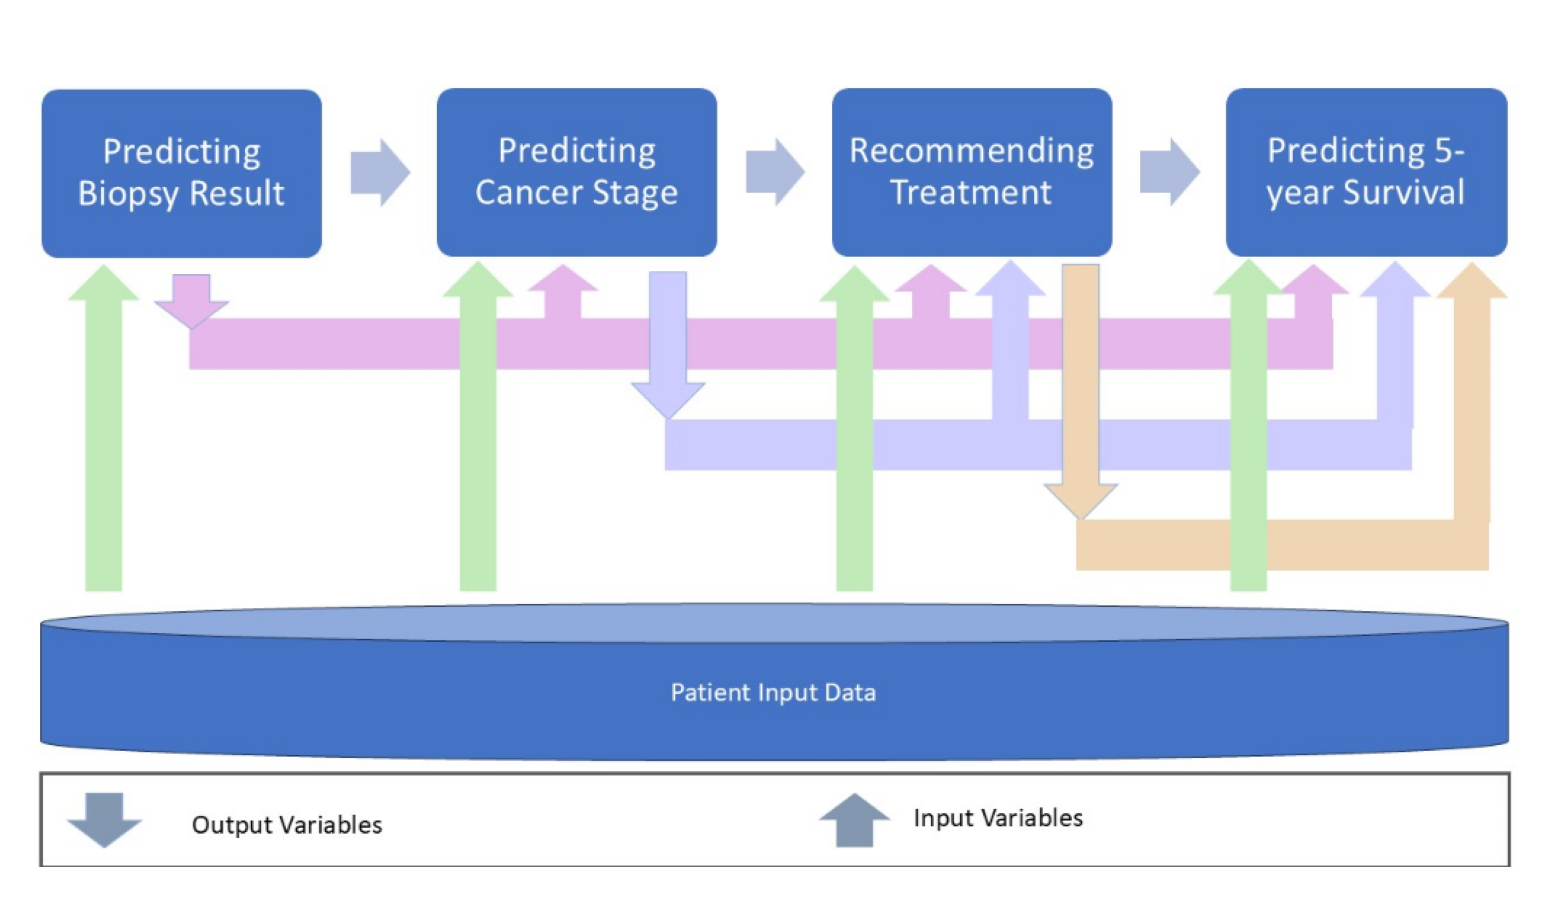

In [32]:
file_path = "C:/Users/Toktam/Documents/GitHub/Kaggle/ProstateCancerPrediction/workflow.jpg"
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("C:/Users/Toktam/Documents/GitHub/Kaggle/ProstateCancerPrediction/workflow.jpg")

# Calculate new dimensions (assuming scaling down by 20%)
scale_factor = 0.8
new_width = int(img.shape[1] * scale_factor)
new_height = int(img.shape[0] * scale_factor)

# Resize image (this maintains aspect ratio inherently)
resized_img = cv2.resize(img, (new_width, new_height))
plt.figure(dpi=300)
# Display resized image using Matplotlib
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.axis('off') # Optional: Turn off axis for cleaner view
plt.show()

Based on this workflow, I considered several tasks to solve several different problems consecutively including:
### 1- Predicting biopsy result from input variables
### 2- Predicting cancer stage from input variables for cases having malignant biopsy result.
### 3- Recommending the treatment from input variables and cancer stage for cases having malignant biopsy result.
### 4- Predicting 5-years survival chance based on input variables, cancer stage and recommended treatment for cases having malignant biopsy result.

In this step, a novel modeling task is designed which includes several consecutive steps.
I followed the logical stepping for defining different consecutive problems based on when each information or variable is determined and its value
may be used for answering and solving which problem. 
### At the first step, the model aims at predicting biopsy result from the input variables.
However, the performance of the model at the first step may be not highly desirable. Because the considered input variables
may have lack of sufficient information for determining the biopsy results. For example, medical images from prostate can be helpful in this step.
But, I want to design predictive models for this problem in spite of lacking desirable performance.
### At the second step, our model predicts Cancer_stage from input variables.
### At the third step, the model predicts recommended treatment based on input variables and cancer stage.
### and at the last step, the model predicts 5-year survival chance based on input variables, cancer stage and recommended treatment

### 6-1 Model evaluation function

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def evaluate_model_performance_func(real_y,pred_y):
    accuracy = accuracy_score(real_y, pred_y)
    print(f" Accuracy: {accuracy}")

    # Classification report includes precision and recall.
    print("Classification Report:")
    print(classification_report(real_y, pred_y))

### 6-2- First Model

Two strong classifiers are chosen and trained for performing each prediction task including:
Support vector machines (SVM) with radial basis function (RBF) kernel as a strong single classifier, and,
Random forests (RF) as a bagging ensemble of decision trees as a strong ensemble model with the ability of assigning feature importance score to each feature

#### 6-2-1 Output variable preparation

In [44]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(output_pcp_dataset['Biopsy_Result'])
train_y1 = le.transform(train_y['Biopsy_Result'])
test_y1 = le.transform(test_y['Biopsy_Result'])


#### 6-2-2 Balance the imbalanced training dataset with random oversampling

In [45]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42) # Use a fixed random state for reproducibility.
# Oversample the minority class.
X_resampled, y_resampled = ros.fit_resample(train_X_scaled, train_y1)
print(X_resampled.shape[0], np.sum(y_resampled))

31222 15611


#### 6-2-3- Random Forest Training and Evaluation

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=4, max_features='sqrt',random_state=42)
rf_model.fit(X_resampled, y_resampled)
pred_train_y = rf_model.predict(train_X_scaled)
pred_test_y = rf_model.predict(test_X_scaled)
print('************* Performance of Model for Training Dataset *************')
evaluate_model_performance_func(train_y1,pred_train_y)
print('\n\n************* Performance of Model for Test Dataset *************')
evaluate_model_performance_func(test_y1,pred_test_y)

************* Performance of Model for Training Dataset *************
 Accuracy: 0.5655752370728216
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.57      0.65     15628
           1       0.36      0.55      0.43      6728

    accuracy                           0.57     22356
   macro avg       0.55      0.56      0.54     22356
weighted avg       0.63      0.57      0.58     22356

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                8945                6683
Actual Positive                3029                3699


************* Performance of Model for Test Dataset *************
 Accuracy: 0.5115405260332797
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.53      0.60      3921
           1       0.30      0.48      0.37      1668

    accuracy                           0.51      5589
   macro avg       0.50  

#### 6-2-4- SVM Training and Evaluation

In [37]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1) 
svm_model.fit(X_resampled, y_resampled)
pred_train_y = svm_model.predict(train_X_scaled)
pred_test_y = svm_model.predict(test_X_scaled)
print('************* Performance of Model for Training Dataset *************')
evaluate_model_performance_func(train_y1,pred_train_y)
print('\n\n************* Performance of Model for Test Dataset *************')
evaluate_model_performance_func(test_y1,pred_test_y)

************* Performance of Model for Training Dataset *************
 Accuracy: 0.4760243335122562
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.43      0.53     15628
           1       0.31      0.58      0.40      6728

    accuracy                           0.48     22356
   macro avg       0.50      0.51      0.47     22356
weighted avg       0.58      0.48      0.49     22356

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                6736                8892
Actual Positive                2822                3906


************* Performance of Model for Test Dataset *************
 Accuracy: 0.45893719806763283
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.42      0.52      3921
           1       0.29      0.56      0.38      1668

    accuracy                           0.46      5589
   macro avg       0.49 

### Analysis of the models' performance
Based on the results obtained, the performance of both models is not satisfactory, even worse than random classification (accuracy lower than 50% for balanced training dataset). 
It is a sign of underfitting and several factors could contribute to this outcome:
#### a- Inadequate hyper-parameter tuning for the models.
#### b- Inappropriate model selection for the task at hand.
#### c- Insufficient informative input variables or poor predictors.
To address these issues, I will first focus on optimizing the hyper-parameters of both models to improve their performance. 

Additionally, I will design and train other popular classifiers to verify whether using different models can mitigate any shortcomings related to model choice (issue a) or data quality (issue b). 

If enhancing hyper-parameters and exploring alternative models do not significantly improve performance, it may indicate that issue c —lack of informative input variables—is a primary concern.

#### 6-2-5 a) Tuning the hyperparameters of RF and SVM

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Define hyperparameter tuning space for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': [ 'rbf', 'poly'],
    'degree': [2, 3],
}

# Define hyperparameter tuning space for RF
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 3],
    
}
svm_model = SVC()
rf_model = RandomForestClassifier()

svm_grid_search = GridSearchCV(estimator=svm_model,
                               param_grid=svm_params,
                               cv=5)

rf_grid_search = GridSearchCV(estimator=rf_model,
                              param_grid=rf_params,
                              cv=5)
# Perform grid search on training data for both models
print("Tuning SVM Hyperparameters : ")
svm_grid_search.fit(X_resampled, y_resampled)
print(f"Best Parameters: {svm_grid_search.best_params_}")
print(f"Best Score: {svm_grid_search.best_score_}")

print("\nTuning Random Forest Hyperparameters : ")
rf_grid_search.fit(X_resampled, y_resampled)
print(f"Best Parameters: {rf_grid_search.best_params_}")
print(f"Best Score: {rf_grid_search.best_score_}")

Tuning SVM Hyperparameters : 


#### 6-2-5 b) Inappropriate model selection for the task at hand.

Training XGBoost, Gradient Boosting Classifiers and Multi-Layer Perceptrons (MLP)

#### XGBoost model training and evaluation

In [43]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=4,learning_rate=0.1,n_estimators=100,gamma=0,
    subsample=0.8,colsample_bytree=0.8,)
xgb_model.fit(X_resampled, y_resampled)
pred_train_y = xgb_model.predict(train_X_scaled)
pred_test_y = xgb_model.predict(test_X_scaled)
print('************* Performance of Model for Training Dataset *************')
evaluate_model_performance_func(train_y1,pred_train_y)
print('\n\n************* Performance of Model for Test Dataset *************')
evaluate_model_performance_func(test_y1,pred_test_y)

************* Performance of Model for Training Dataset *************
 Accuracy: 0.6380837359098228
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.65      0.72     15628
           1       0.43      0.61      0.50      6728

    accuracy                           0.64     22356
   macro avg       0.61      0.63      0.61     22356
weighted avg       0.68      0.64      0.65     22356

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               10166                5462
Actual Positive                2629                4099


************* Performance of Model for Test Dataset *************
 Accuracy: 0.5274646627303632
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.56      0.63      3921
           1       0.30      0.45      0.36      1668

    accuracy                           0.53      5589
   macro avg       0.50  

#### Analyzing XGBoost performance
When I increase max-depth to 5 or more, its accuracy on training dataset improves significantly, but the accuracy on the test dataset remains unchanges.
Therefore, it can be concluded that max_depth equal or more than 5 cause the model to be overfitted.
On the other hand, lower max_depth lead to performance decrease for training data.
It shows that XGBoost cannot reach to desirable performance on the test dataset.

#### MLP model training and evaluation

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

train_X_resampled_np = np.array(X_resampled)
train_y_resampled_np = np.array(y_resampled)
train_X_np = np.array(train_X_scaled)
train_y_np = np.array(train_y1)
test_X_np = np.array(test_X_scaled)
test_y_np = np.array(test_y1)
n_features = train_X_resampled_np.shape[1]
n_classes = 1

mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', input_shape=(n_features,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(n_classes, activation='sigmoid')
])

# Compile model; corrected loss function name (binary_crossentropy instead of binary_cross_entropy).
mlp_model.compile(optimizer='adam', loss='binary_crossentropy')
mlp_model.summary()
# Fit model to resampled data.
mlp_history= mlp_model.fit(train_X_resampled_np, train_y_resampled_np,
              epochs=10,
              batch_size=128,
              validation_split=0.2)

pred_train_probabilities = mlp_model.predict(train_X_np )
pred_test_probabilities   = mlp_model.predict(test_X_np )

# Apply custom thresholding if needed (e.g., different from default 0.5).
threshold_value = 0.5 

pred_train_labels   = (pred_train_probabilities > threshold_value).astype(int).flatten()
pred_test_labels     =( pred_test_probabilities > threshold_value ).astype(int).flatten()

print('************* Performance of Model for Training Dataset *************')
evaluate_model_performance_func(train_y_np,pred_train_labels )
print('\n\n************* Performance of Model for Test Dataset *************')
evaluate_model_performance_func(test_y_np,pred_test_labels ) 


C:\Users\Toktam\anaconda3\envs\Python_3_11\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 172,289 (673.00 KB)

 Trainable params: 170,497 (666.00 KB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.9104 - val_loss: 0.8671
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7170 - val_loss: 0.9264
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6766 - val_loss: 0.9395
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6738 - val_loss: 0.9511
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6714 - val_loss: 0.9941
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6695 - val_loss: 0.9605
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6686 - val_loss: 0.9892
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6669 - val_loss: 0.9722
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6698 - val_loss: 1.0276
Epoch 10/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6663 - val_loss: 0.9194
699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step
************* Performance of Model for Training Datas

#### Analyzing MLP performance

I examined different number of layers, and different number of neurons for mlp. 
Moreover, I tried different values of threshold for output classification such as 0.5 and 0.4.
But, the performance of mlp does not improve significantly.
Therefore, it can be concluded that the third issue is the main reason of lacking reasonable performance for predicting biopsy result.

### 6-3 Predicting cancer stage from input variables and biospy result

#### 6-3-1- Preparing data for cancer stage prediction

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np
augmented_pcp_dataset = input_pcp_dataset
augmented_pcp_dataset['Biopsy_Result'] = output_pcp_dataset['Biopsy_Result']
augmented_pcp_dataset['Cancer_Stage'] = output_pcp_dataset['Cancer_Stage']

malignant_pcp_dataset = augmented_pcp_dataset[augmented_pcp_dataset['Biopsy_Result']=='Malignant']
print(malignant_pcp_dataset.shape,malignant_pcp_dataset.columns)

cancer_stage = malignant_pcp_dataset['Cancer_Stage']
malignant_input_dataset = malignant_pcp_dataset.drop(['Cancer_Stage','Biopsy_Result'],axis=1)
train_X, test_X, train_y , test_y = train_test_split(malignant_input_dataset,cancer_stage, test_size=0.2)
print(train_X.shape, test_X.shape, train_y.shape,test_y.shape)


train_y2 = np.array(train_y)
test_y2 = np.array(test_y)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc.fit(np.concatenate([train_y2.reshape(-1,1), test_y2.reshape(-1,1)]))
train_y2_encoded = enc.transform(train_y2.reshape(-1,1))
test_y2_encoded = enc.transform(test_y2.reshape(-1,1))

print('input shape for training and test datasets: ',train_X.shape,test_X.shape)
print('Output shape for training and test datasets: ',train_y2_encoded.shape,test_y2_encoded.shape)


(8396, 29) Index(['Age', 'PSA_Level', 'BMI', 'Screening_Age', 'Prostate_Volume',
       'Family_History_Yes', 'Race_African_Ancestry_Yes', 'DRE_Result_Normal',
       'Difficulty_Urinating_Yes', 'Weak_Urine_Flow_Yes', 'Blood_in_Urine_Yes',
       'Pelvic_Pain_Yes', 'Back_Pain_Yes', 'Erectile_Dysfunction_Yes',
       'Exercise_Regularly_Yes', 'Healthy_Diet_Yes', 'Smoking_History_Yes',
       'Alcohol_Consumption_High', 'Alcohol_Consumption_Low',
       'Alcohol_Consumption_Moderate', 'Hypertension_Yes', 'Diabetes_Yes',
       'Cholesterol_Level_Normal', 'Follow_Up_Required_Yes',
       'Genetic_Risk_Factors_Yes', 'Previous_Cancer_History_Yes',
       'Early_Detection_Yes', 'Biopsy_Result', 'Cancer_Stage'],
      dtype='object')
(6716, 27) (1680, 27) (6716,) (1680,)
input shape for training and test datasets:  (6716, 27) (1680, 27)
Output shape for training and test datasets:  (6716, 3) (1680, 3)


#### 6-3-2 Training and evaluating XGBoost for cancer stage prediction

In [16]:
import xgboost as xgb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN


def xgb_training_evaluating(train_X_CS, test_X_CS, train_y2, test_y2,max_depth, learning_rate, n_estimators, gamma,
                          subsample, colsample_bytree,return_probability=False,sampling_strategy='SMOTEENN'):
    if sampling_strategy == 'undersampling':
        ros = RandomUnderSampler(random_state=42) # Use a fixed random state for reproducibility.
        # Oversample the minority class.
        X_CS_resampled, y_CS_resampled = ros.fit_resample(train_X_CS, train_y2)
    if sampling_strategy == 'oversampling':
        ros = RandomOverSampler(random_state=42) # Use a fixed random state for reproducibility.
        # Oversample the minority class.
        X_CS_resampled, y_CS_resampled = ros.fit_resample(train_X_CS, train_y2)
    if sampling_strategy == 'SMOTEENN':
        smote_enn = SMOTEENN(random_state=42)
        X_CS_resampled, y_CS_resampled = smote_enn.fit_resample(train_X_CS, train_y2)
    
    xgb_model = xgb.XGBClassifier(max_depth=max_depth,learning_rate=learning_rate,n_estimators=n_estimators,gamma=gamma,
    subsample=subsample,colsample_bytree=colsample_bytree)
    xgb_model.fit(X_CS_resampled, y_CS_resampled)
    if return_probability:
        return xgb_model.predict_proba(train_X_CS)[:, 1], xgb_model.predict_proba(test_X_CS)[:, 1]
    else:
        pred_train_y = xgb_model.predict(train_X_CS)
        print(pred_train_y.shape)
        pred_test_y = xgb_model.predict(test_X_CS)
        print('************* Performance of Model for Training Dataset *************')
        evaluate_model_performance_func(train_y2,pred_train_y)
        print('\n\n************* Performance of Model for Test Dataset *************')
        evaluate_model_performance_func(test_y2,pred_test_y)
    
    return pred_train_y,pred_test_y
    


In [17]:
_,_ = xgb_training_evaluating(train_X, test_X, train_y2_encoded, test_y2_encoded,10, 0.1, 200, 0, 0.8, 0.8)
_,_ = xgb_training_evaluating(train_X, test_X, train_y2_encoded, test_y2_encoded,10, 0.1, 200, 0, 0.5, 0.8)
_,_ = xgb_training_evaluating(train_X, test_X, train_y2_encoded, test_y2_encoded,5, 0.1, 200, 0, 0.8, 0.8)

(6716, 3)
************* Performance of Model for Training Dataset *************
 Accuracy: 0.46813579511614056
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.75      0.61      1350
           1       0.95      0.34      0.50      4720
           2       0.54      0.94      0.69       646

   micro avg       0.67      0.48      0.56      6716
   macro avg       0.67      0.68      0.60      6716
weighted avg       0.82      0.48      0.54      6716
 samples avg       0.47      0.48      0.48      6716



************* Performance of Model for Test Dataset *************
 Accuracy: 0.18035714285714285
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.24      0.23       363
           1       0.68      0.20      0.31      1151
           2       0.10      0.13      0.11       166

   micro avg       0.35      0.20      0.26      1680
   macro avg       0.33      0.19    

C:\Users\Toktam\anaconda3\envs\Python_3_11\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Toktam\anaconda3\envs\Python_3_11\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(6716, 3)
************* Performance of Model for Training Dataset *************
 Accuracy: 0.47051816557474685
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.74      0.59      1350
           1       0.95      0.35      0.51      4720
           2       0.53      0.94      0.68       646

   micro avg       0.66      0.49      0.56      6716
   macro avg       0.66      0.68      0.59      6716
weighted avg       0.81      0.49      0.55      6716
 samples avg       0.48      0.49      0.48      6716



************* Performance of Model for Test Dataset *************
 Accuracy: 0.19166666666666668
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.24      0.22       363
           1       0.69      0.22      0.33      1151
           2       0.12      0.16      0.14       166

   micro avg       0.36      0.22      0.27      1680
   macro avg       0.34      0.20    

C:\Users\Toktam\anaconda3\envs\Python_3_11\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Toktam\anaconda3\envs\Python_3_11\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(6716, 3)
************* Performance of Model for Training Dataset *************
 Accuracy: 0.40544967242406194
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.65      0.52      1350
           1       0.93      0.33      0.49      4720
           2       0.42      0.77      0.55       646

   micro avg       0.60      0.44      0.51      6716
   macro avg       0.59      0.58      0.52      6716
weighted avg       0.78      0.44      0.50      6716
 samples avg       0.42      0.44      0.43      6716



************* Performance of Model for Test Dataset *************
 Accuracy: 0.19047619047619047
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.28      0.24       363
           1       0.68      0.23      0.35      1151
           2       0.11      0.17      0.13       166

   micro avg       0.36      0.24      0.28      1680
   macro avg       0.34      0.23    

C:\Users\Toktam\anaconda3\envs\Python_3_11\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Toktam\anaconda3\envs\Python_3_11\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 6-3-2-1 Analyzing the performance of XGBoost
According to the experimental results for different values of hyperparameters, XGBoost suffers from overfitting.
The first solution is converting multi-class classification task into several binary classification tasks and 
then aggregate the classifiers' outputs.
For this purpose, I choose one-against-all classification.

#### 6-3-2-2 preparing output data for one against all classification

In [18]:
#remove cases with biopsy result = benign

train_y21 = train_y2_encoded[:,0]
train_y22 = train_y2_encoded[:,1]
train_y23 = train_y2_encoded[:,2]
test_y21 = test_y2_encoded[:,0]
test_y22 = test_y2_encoded[:,1]
test_y23 = test_y2_encoded[:,2]

#### 6-3-2-3 Training and evaluating XGBoost for one against all classification

In [19]:
pred_train_y21, pred_test_y21 = xgb_training_evaluating(train_X, test_X, train_y21, test_y21,9, 0.1, 250, 0, 0.8, 0.8)
pred_train_y22, pred_test_y22 = xgb_training_evaluating(train_X, test_X, train_y22, test_y22,9, 0.1, 250, 0, 0.8, 0.8)
pred_train_y23, pred_test_y23 = xgb_training_evaluating(train_X, test_X, train_y23, test_y23,9, 0.1, 200, 0, 0.8, 0.8)


(6716,)
************* Performance of Model for Training Dataset *************
 Accuracy: 0.789458010720667
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.85      5366
         1.0       0.49      0.84      0.62      1350

    accuracy                           0.79      6716
   macro avg       0.72      0.81      0.74      6716
weighted avg       0.86      0.79      0.81      6716



************* Performance of Model for Test Dataset *************
 Accuracy: 0.6113095238095239
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.69      0.74      1317
         1.0       0.22      0.33      0.27       363

    accuracy                           0.61      1680
   macro avg       0.51      0.51      0.50      1680
weighted avg       0.67      0.61      0.63      1680

(6716,)
************* Performance of Model for Training Dataset *************
 Accuracy: 0.6879

In [33]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report
import xgboost as xgb  # Import XGBoost

import numpy as np

def create_extended_features(a, b, c):
    """
    Creates extended features from three input arrays (a, b, c).

    Args:
        a, b, c: NumPy arrays of the same shape.

    Returns:
        A NumPy array with the original columns (a, b, c) and the new
        calculated features.  Handles division by zero gracefully.
    """

    # Calculate the new features
    sum_abc = a + b + c

    # Handle potential division by zero
    with np.errstate(divide='ignore', invalid='ignore'):  # Temporarily suppress warnings

        new_a = a/(a+b+c)
        new_b = b/(a+b+c)
        new_c = c/(a+b+c)

        extended_features = np.column_stack([
            a,  # Original feature a
            b,  # Original feature b
            c,  # Original feature c
            a + b - c,
            b + c - a,
            np.where(sum_abc != 0, a / sum_abc, 0),  # a/(a+b+c) - handles division by zero
            np.where(sum_abc != 0, b / sum_abc, 0),  # b/(a+b+c) - handles division by zero
            np.where(sum_abc != 0, c / sum_abc, 0),  # c/(a+b+c) - handles division by zero
            np.where(sum_abc != 0, (a + b) / sum_abc, 0),  # (a+b)/(a+b+c) - handles division by zero
            np.where((a+b) !=0, (a - b) / (a + b), 0),  # (a-b)/(a+b) - handles division by zero
            np.where((b+c) !=0, (b - c) / (b + c), 0),  # (b-c)/(b+c) - handles division by zero
        ])

    return extended_features

def MLP_Model(n_features,n_classes):
    mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', input_shape=(n_features,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

    # Compile model; corrected loss function name (binary_crossentropy instead of binary_cross_entropy).
    mlp_model.compile(optimizer='adam', loss='categorical_crossentropy')
    mlp_model.summary()
    return mlp_model
    
def train_model_aggregate(train_X, test_X, train_X_svm, test_X_svm, train_y2_encoded, test_y2_encoded):
    """
    Trains an model to aggregate predictions from three one-vs-all previous models.

    Args:
        pred_train_y21, pred_train_y22, pred_train_y23:  XGBoost predictions (probability or class labels)
                                                       for each of the three one-vs-all models on the training data.
        pred_test_y21, pred_test_y22, pred_test_y23:  XGBoost predictions (probability or class labels)
                                                      for each of the three one-vs-all models on the test data.
        train_y2_encoded: One-hot encoded training labels.
        test_y2_encoded: One-hot encoded test labels.

    Returns:
        cls_model: The trained model.
        train_y_pred: Predicted labels for the train set.
        test_y_pred: Predicted labels for the test set.
    """

    # Train the SVM
    train_X_total = np.column_stack([train_X,train_X_svm])
    test_X_total = np.column_stack([test_X,test_X_svm])
    cl_model = MLP_Model(n_features=train_X_total.shape[1],n_classes=train_y2_encoded.shape[1]) 
    # Fit model to resampled data.
    mlp_history= cl_model.fit(train_X_total, train_y2_encoded,
              epochs=10,
              batch_size=128,
              validation_split=0.2)
    # 3. Make predictions
    test_y_pred = cl_model.predict(test_X_total)
    train_y_pred = cl_model.predict(train_X_total)


    return cl_model, train_y_pred, test_y_pred

# Prepare target variables
train_y21 = train_y2_encoded[:,0]
train_y22 = train_y2_encoded[:,1]
train_y23 = train_y2_encoded[:,2]
test_y21 = test_y2_encoded[:,0]
test_y22 = test_y2_encoded[:,1]
test_y23 = test_y2_encoded[:,2]

# Get XGBoost predictions
pred_train_y21, pred_test_y21 = xgb_training_evaluating(train_X, test_X, train_y21, test_y21,9, 0.1, 250, 0, 0.8, 0.8,True) 
pred_train_y22, pred_test_y22 = xgb_training_evaluating(train_X, test_X, train_y22, test_y22,9, 0.1, 250, 0, 0.8, 0.8,True) 
pred_train_y23, pred_test_y23 = xgb_training_evaluating(train_X, test_X, train_y23, test_y23,9, 0.1, 250, 0, 0.8, 0.8,True) 

train_X_model = create_extended_features(pred_train_y21, pred_train_y22, pred_train_y23)
test_X_model  = create_extended_features(pred_test_y21, pred_test_y22, pred_test_y23) # Apply the SAME transformation to test

print(train_X_model.shape)  

# Train the SVM aggregator
_, train_y_pred, test_y_pred = train_model_aggregate(train_X,test_X,train_X_model, test_X_model,train_y2_encoded, test_y2_encoded)

(6716, 11)


C:\Users\Toktam\anaconda3\envs\Python_3_11\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 128)                 │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,723 (682.51 KB)

 Trainable params: 172,931 (675.51 KB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.6888 - val_loss: 0.7820
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1615 - val_loss: 0.7849
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0240 - val_loss: 0.7136
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9297 - val_loss: 0.7023
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7407 - val_loss: 0.7139
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6839 - val_loss: 0.5724
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6350 - val_loss: 0.5399
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5864 - val_loss: 0.5824
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5526 - val_loss: 0.4658
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5345 - val_loss: 0.4835
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [32]:
# Evaluate the aggregated predictions
print(classification_report(np.argmax(train_y2_encoded, axis=1), np.argmax(train_y_pred,axis=1))) # Corrected evaluation to use test data
print(classification_report(np.argmax(test_y2_encoded, axis=1), np.argmax(test_y_pred,axis=1))) # Corrected evaluation to use test data

              precision    recall  f1-score   support

           0       0.77      0.45      0.57      1350
           1       0.77      0.96      0.85      4720
           2       1.00      0.01      0.03       646

    accuracy                           0.77      6716
   macro avg       0.85      0.48      0.48      6716
weighted avg       0.79      0.77      0.72      6716

              precision    recall  f1-score   support

           0       0.20      0.04      0.07       363
           1       0.68      0.95      0.80      1151
           2       0.00      0.00      0.00       166

    accuracy                           0.66      1680
   macro avg       0.29      0.33      0.29      1680
weighted avg       0.51      0.66      0.56      1680



C:\Users\Toktam\anaconda3\envs\Python_3_11\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Toktam\anaconda3\envs\Python_3_11\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Toktam\anaconda3\envs\Python_3_11\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

#### Analyzing the performance of the models for cancer stage prediction
According to the performance of different models, it can be concluded that the second class label 'Advanced cancer stage' is predicted with
high accuracy. However, Localized and Metastatic cancer stages are not predicted well. 
It shows that models are biased toward the 'Advanced cancer stage' class label. 
In spite of different models and algorithms that I implemented, this issue has not been addressed appropriately.

#### Strengths
##### High Precision for Class 2 in Training:
The model achieved perfect precision (1.00) for metastatic cases during training, indicating that when it predicts a case as metastatic, it is correct.
##### Strong Recall for Class 1:
The advanced stage class shows high recall (0.96) in the training set, meaning the model effectively identifies most advanced cases.
#### Weaknesses
##### Low Recall for Class 0 in Test Data:
The recall for localized cancer drops significantly to only 0.04 in the test set, suggesting that the model struggles to identify localized cases correctly.
##### Poor Performance on Class 2 in Test Data:
The model fails to predict any metastatic cases in the test set, as indicated by a precision and recall of zero, which highlights a critical area needing improvement.
#### Overall Accuracy:
The overall accuracy of the model is lower in the test set (66%) compared to the training set (77%), indicating potential overfitting where the model performs well on training data but poorly on unseen data.
#### Macro and Weighted Averages:
The macro average scores are relatively low, particularly for precision and recall (both around or below 0.30), indicating that the model does not perform uniformly across all classes.
#### Recommendations for Improvement
##### Data Augmentation: 
Consider augmenting your dataset, especially for underrepresented classes like localized and metastatic cancers, to improve model generalization.
Model Tuning: Explore hyperparameter tuning to optimize performance across all classes, potentially using techniques like grid search or random search.
##### Advanced Techniques: 
Investigate more sophisticated models or ensemble methods that may handle class imbalances better and improve overall predictive performance.
##### Evaluation Metrics Focus: 
Since cancer stage prediction is critical, focusing on improving recall for all classes, especially classifying localized and metastatic cases, should be prioritized.

# Conclusion
This notebook is prepared for training purposes to students interested in data analytics in healthcare.
I have chosen a challenging dataset related to disease diagnosis in healthcare and tried to find its challenges and 
issues for building predictive models.
Therefore, biopy result prediction and cancer stage prediction are considered in this notebook and solved based on some
basic machine learning models.
The performance of the models are analyzed and tried to address the challenges.
However, further improvements for Cancer stage prediction and providing predictive models for treatment recommendation and
5-year survival will be provided in the next versions of the notebook.
I hope this notebook will be helpful for training purposes.
However, some data preprocessing challenges and issues such as missing value handling and outlier detection are not considered in this notebook.